<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [149]:
# ANSWER
titanic_csv = pd.read_csv('/Users/winifredwetthasinghe/Documents/Data_Science_Course_UTS/Labs/DATA/titanic_train.csv')
titanic_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

In [150]:
titanic_csv.set_index('PassengerId', inplace=True)

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [151]:
# ANSWER
titanic_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [152]:
titanic_csv.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [153]:
titanic_csv.isna().sum().sum()

866

In [154]:
titanic_csv.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [155]:
titanic_csv=titanic_csv.fillna(0)

In [156]:
titanic_csv.isna().sum().sum()

0

In [157]:
titanic_csv.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [158]:
# ANSWER
#Input features
X = titanic_csv[['Pclass','Parch']]
y = titanic_csv['Survived']

In [159]:
X.shape

(891, 2)

In [160]:
y.shape

(891,)

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [161]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(668, 2) (223, 2) (668,) (223,)


#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [162]:
# ANSWER
# Create Model
reg = LogisticRegression(max_iter=1000)

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [177]:
# ANSWER
# Fit Model
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [179]:
y_pred_train.shape, y_pred_test.shape

((668,), (223,))

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [164]:
# ANSWER
reg.coef_

array([[-0.87239066,  0.337888  ]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [165]:
# ANSWER
reg.intercept_

array([1.30430282])

We can create tuples of the predictor names and coefficients like this:

In [166]:
feature_cols = titanic_csv[['Pclass','Parch']]
feature_cols

,Pclass,Parch
PassengerId,,
1,3,0
2,1,0
3,3,0
4,1,0
5,3,0
...,...,...
887,2,0
888,1,0
889,3,2


In [180]:
# ANSWER
print(set(zip(feature_cols, reg.coef_[0])))

{('Parch', 0.3378880048779747), ('Pclass', -0.8723906606017785)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [181]:
for col in zip(X_train.columns, reg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.872391
Parch       +0.337888


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [187]:
# ANSWER
from sklearn.metrics import accuracy_score
accuracy_train=accuracy_score(y_train, y_pred_train)
accuracy_train

0.6901197604790419

What is the  `accuracy_score` for the test data?

In [188]:
# ANSWER
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, y_pred_test)
accuracy_test

0.6681614349775785

What can we say aout this result?

In [189]:
#Finding the
accuracy_train-accuracy_test

0.02195832550146337

In [ ]:
#The variation between accuracy score of test and train is considerably minor and it seems the overfitting.....

ANSWER
- ...
- ...

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [115]:
# ANSWER
X1 = titanic_csv[['Pclass','Parch','Age']]
y1 = titanic_csv['Survived']

In [190]:
# Build Model
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)
longreg = LogisticRegression(max_iter=1000)

# Fit Model
longreg.fit(X1_train, y1_train)
y1_pred = longreg.predict(X1_test)

# Score
accuracy_score(y1_test, y1_pred)

(668, 3) (223, 3) (668,) (223,)


0.6860986547085202

So, including age did little to reduce the variance in our model. Why might this be?

In [ ]:
#TODO

ANSWER

- ...
- ...
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [142]:
# ANSWER
from sklearn import metrics
y1_pred_class = longreg.predict(X1_test)
print(metrics.confusion_matrix(y1_test, y1_pred_class))

[[109  19]
 [ 51  44]]


Nb. Here is how `confusion_matrix` arranges its output:

In [143]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

In [ ]:
#ANSWER
# False Positive (Type 1 Error): Outcome where the model incorrectly predicts the positive class.
# False Negative (Type 2 Error): Outcome where the model incorrectly predicts the negative class.

ANSWER: ...

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

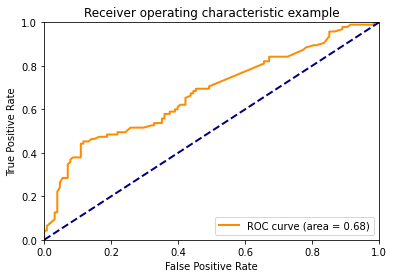

In [191]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = longreg.predict_proba(X1_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y1_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [194]:
titanic_with_dummies = pd.get_dummies(data = titanic_csv, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'], drop_first=True )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,0,1,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [196]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_3", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_3", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

In [201]:
titanic_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Name        891 non-null    object 
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Ticket      891 non-null    object 
 6   Fare        891 non-null    float64
 7   Cabin       891 non-null    object 
 8   Sex_male    891 non-null    uint8  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
 12  Pclass_2    891 non-null    uint8  
 13  Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(3), object(3), uint8(6)
memory usage: 67.9+ KB


Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [202]:
# ANSWER
# Set Feature Both Numerical, Categorical
X2 = titanic_with_dummies[['SibSp','Fare','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Pclass_2','Pclass_3','Parch','Age']]
y2 = titanic_with_dummies['Survived']

# Build Model
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)
dumreg = LogisticRegression(max_iter=1000)

# Fit Model
dumreg.fit(X2_train, y2_train)
y2_pred =dumreg.predict(X2_test)

# Score
accuracy_score(y2_test, y2_pred)

(668, 10) (223, 10) (668,) (223,)


0.8026905829596412

Plot the ROC curve for the new model:

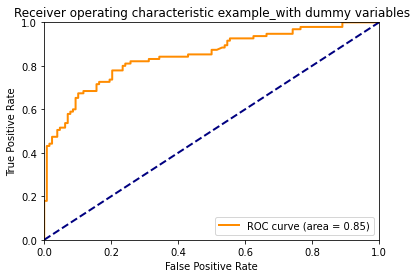

In [204]:
# ANSWER
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = dumreg.predict_proba(X2_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y2_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example_with dummy variables')
plt.legend(loc = "lower right")
plt.show()

Can we improve the model by including the remaining features?

In [ ]:
# ANSWER 
#The remianing features aren't making an impact on the model. But the situation will change in a different circumstances.

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



